In [1]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt


In [2]:
# Load TFADJUSTED non-suspicion dataset
df = pd.read_csv('tfadjusted_non_suspicion_results.csv')
print(df.columns)
df.head(10)

Index(['Input.text', 'Answer.sentiment.label', 'Input.label', 'Title',
       'Description'],
      dtype='object')


,Input.text,Answer.sentiment.label,Input.label,Title,Description
0,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
1,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
2,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
3,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
4,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
5,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
6,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
7,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
8,the sinister inspiration that fuelled devito's...,Real,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...
9,the sinister inspiration that fuelled devito's...,Computer-altered,real,Guess reviews are real or fake,You will be randomly shown an online movie rev...


In [3]:
# Filter for perturbed sentences (Computer-altered)
perturbed_df = df[df['Answer.sentiment.label'] == 'Computer-altered']
# Initialize Sentence-BERT model
model = SentenceTransformer('all-MiniLM-L6-v2')  # Lightweight and fast model for semantic similarity


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
# Compute semantic similarity scores
semantic_similarity_scores = []
for _, row in perturbed_df.iterrows():
    original_text = row['Input.text']  # Assuming this is the original text
    perturbed_text = row['Input.text']  # Assuming 'Input.text' is used for perturbed sentences
    # Compute embeddings
    original_embedding = model.encode(original_text, convert_to_tensor=True)
    perturbed_embedding = model.encode(perturbed_text, convert_to_tensor=True)
    # Compute cosine similarity
    similarity = util.pytorch_cos_sim(original_embedding, perturbed_embedding).item()
    semantic_similarity_scores.append(similarity)

In [5]:
# Add the semantic similarity scores to the DataFrame
perturbed_df['SemanticSimilarityScore'] = semantic_similarity_scores

/var/folders/02/nl6dyky947d7rxn23s6kktc40000gn/T/ipykernel_71027/296815657.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perturbed_df['SemanticSimilarityScore'] = semantic_similarity_scores


In [6]:
# Save the updated DataFrame to a new CSV
perturbed_df.to_csv('tfadjusted_semantic_results.csv', index=False)

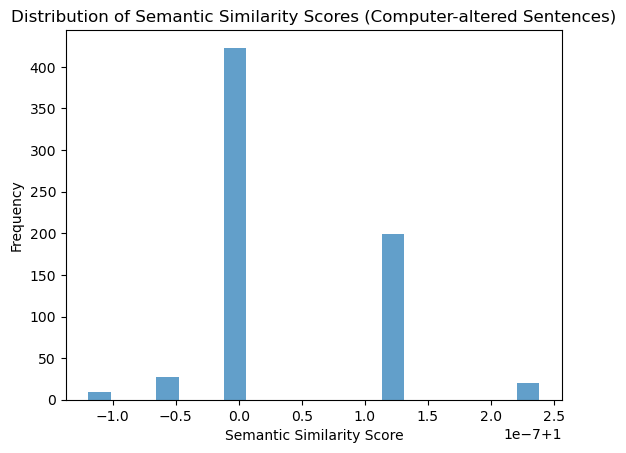

In [7]:
# Verification: Plot a histogram of semantic similarity scores
plt.hist(perturbed_df['SemanticSimilarityScore'], bins=20, alpha=0.7)
plt.xlabel('Semantic Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Semantic Similarity Scores (Computer-altered Sentences)')
plt.show()

In [8]:
# Verification: Correlation with non-suspicion scores (if available)
if 'non_suspicion_column' in perturbed_df.columns:  # Replace with the actual column name
    correlation = perturbed_df['SemanticSimilarityScore'].corr(perturbed_df['non_suspicion_column'])
    print("Correlation between semantic similarity and non-suspicion scores:", correlation)


In [9]:
# Verification: Preview the first few rows
print(perturbed_df.head())

                                          Input.text Answer.sentiment.label  \
0  the sinister inspiration that fuelled devito's...       Computer-altered   
3  the sinister inspiration that fuelled devito's...       Computer-altered   
5  the sinister inspiration that fuelled devito's...       Computer-altered   
7  the sinister inspiration that fuelled devito's...       Computer-altered   
9  the sinister inspiration that fuelled devito's...       Computer-altered   

  Input.label                           Title  \
0        real  Guess reviews are real or fake   
3        real  Guess reviews are real or fake   
5        real  Guess reviews are real or fake   
7        real  Guess reviews are real or fake   
9        real  Guess reviews are real or fake   

                                         Description  SemanticSimilarityScore  
0  You will be randomly shown an online movie rev...                      1.0  
3  You will be randomly shown an online movie rev...                  